In [ ]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/sharmaroshan/Clustering-of-Mall-Customers/refs/heads/master/Mall_Customers.csv')
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#Data Information

In [ ]:
numeric = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical = data.select_dtypes(include=['object']).columns.tolist()
print(f"numeric columns is {numeric}")
print(f"categorical columns is {categorical}")

numeric columns is ['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
categorical columns is ['Genre']


# Check Correlation

before we doing clustering in data, we check correlation between x variabbel:
- between numeric-numeric
- between categorical and numeric
- between categorical and categorical

## Relationship between numeric variabels
We can determine using correlation Perason`

In [ ]:
cor_numeric = data[[i for i in numeric if i!= 'CustomerID']].corr()
cor_numeric

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


based on table correlation above there're moderate relationship between annual income and age and also weak correlation between spending score and age, between spending score and annual income

## Relationship between categorical and numeric

### Gender vs Age

In [ ]:
# search witthin class each female and male in Age
import numpy as np
cat = data['Genre'].unique().tolist()
p_within = []
withinGenderAge = []
for i,j in enumerate(cat):
  subset = data[data['Genre'] == j]['Age']
  length = subset.shape[0]
  p_cat = length/data.shape[0]
  mean = subset.mean()
  within = (np.sum((subset - mean)**2))/length
  withinGenderAge.append(within)
  p_within.append(p_cat)
#total combination gender
#usig array for multiplication for each element in a list
total = np.sum(np.array(withinGenderAge) * np.array(p_within))
#varians age
varians_age = np.var(data['Age'],ddof=0)
korelation_ratio = (varians_age  - total)/varians_age
print(f"correlation between gender and age is {korelation_ratio}")


correlation between gender and age is 0.0037048388048868965


### Gender vs Income

In [ ]:
# search witthin class each female and male in Annual Income (k$)
import numpy as np
cat = data['Genre'].unique().tolist()
p_within = []
withinGenderAge = []
for i,j in enumerate(cat):
  subset = data[data['Genre'] == j]['Annual Income (k$)']
  length = subset.shape[0]
  p_cat = length/data.shape[0]
  mean = subset.mean()
  within = (np.sum((subset - mean)**2))/length
  withinGenderAge.append(within)
  p_within.append(p_cat)
#total combination gender
#usig array for multiplication for each element in a list
total = np.sum(np.array(withinGenderAge) * np.array(p_within))
#varians Annual Income (k$)
varians = np.var(data['Annual Income (k$)'],ddof=0)
korelation_ratio = (varians  - total)/varians
print(f"correlation between gender and Annual Income (k$) is {korelation_ratio}")


correlation between gender and Annual Income (k$) is 0.0031820666503995076


### Gender vs Score

In [ ]:
# search witthin class each female and male in Spending Score (1-100)
import numpy as np
cat = data['Genre'].unique().tolist()
p_within = []
withinGenderAge = []
for i,j in enumerate(cat):
  subset = data[data['Genre'] == j]['Spending Score (1-100)']
  length = subset.shape[0]
  p_cat = length/data.shape[0]
  mean = subset.mean()
  within = (np.sum((subset - mean)**2))/length
  withinGenderAge.append(within)
  p_within.append(p_cat)
#total combination gender
#usig array for multiplication for each element in a list
total = np.sum(np.array(withinGenderAge) * np.array(p_within))
#varians Annual Income (k$)
varians = np.var(data['Spending Score (1-100)'],ddof=0)
korelation_ratio = (varians  - total)/varians
print(f"correlation between gender and Spending Score (1-100) is {korelation_ratio}")


correlation between gender and Spending Score (1-100) is 0.003376625578574108


In calculating the variance, we treat this dataset as the whole population of interest, so we use ddof = 0. This means our conclusions and clustering results only describe the customers in this dataset at that point in time. If we use a different dataset (e.g. from another time period), the clustering result may change.

Based on the check correlation we can get information
- between age and spending score is moderate correlation, other than is weak correlation
- between categorical vs numeric we can get
  - correlation between gender and Spending Score (1-100) is 0.003376625578574108
  - correlation between gender and Annual Income (k$) is 0.0031820666503995076
  - correlation between gender and age is 0.0037048388048868965

So, gender and numeric have no correlation because all the relationship have weak correlation, so it can't help us to forming. Meanwhile we can use age and spending score to build cluster of the data

##

# STANDARIZATION

Because the most contribute to build cluster in a dataset is age and spending score, we just only standarization age and spending score

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#scale age and spending score
scaled_dat = scaler.fit_transform(data[['Age','Spending Score (1-100)']])


#Implement K-Means Clustering

the first thing to do is choose k that we want to use in clustering using elbow method

Text(0, 0.5, 'wcss')

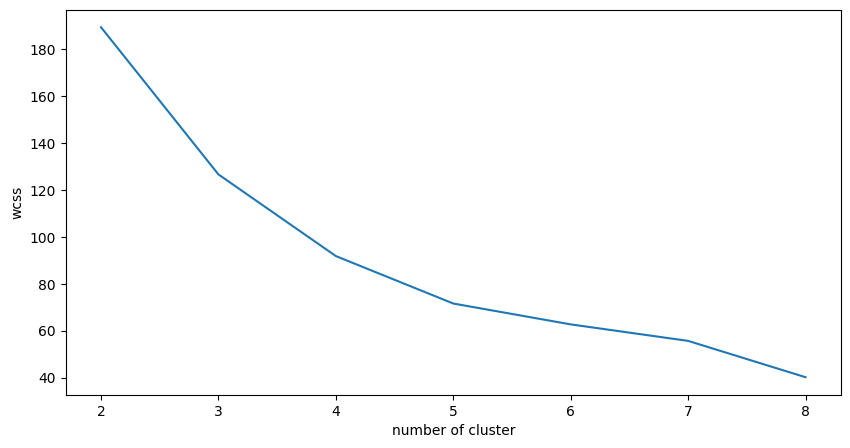

In [ ]:
#elbow method
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
#using k from 2 to 8
k = [i for i in range(2,9)]
#within cluster sum of square for every k
wcss = []
for i,j in enumerate(k):
  #using init centroind k-means++
  kmeans = KMeans(n_clusters=j,init='k-means++',random_state=42)
  kmeans.fit(scaled_dat)
  wcss.append(kmeans.inertia_)

#plot
fig,ax = plt.subplots(figsize=(10,5))
ax.plot(k,wcss)
ax.set_xlabel('number of cluster')
ax.set_ylabel('wcss')

based on the result we chose 4 for k cluster because its a elbow point for this graph. Before that we know there's decrease signifcantly in k 2 to 3 and then after 4, the decrease is not significant

after that we implement the k-menans clustering

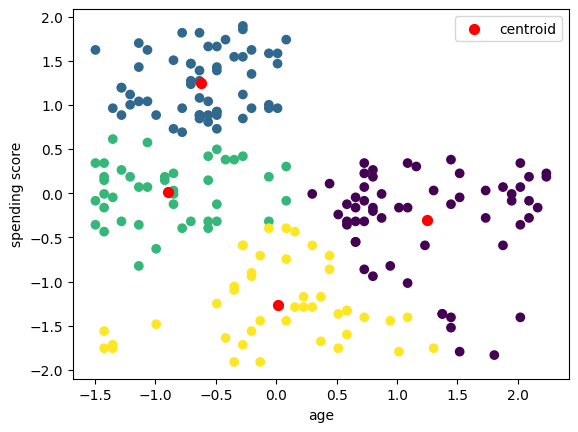

In [ ]:
#k-means
from sklearn.cluster import KMeans
#model
kmeans = KMeans(n_clusters=4,init='k-means++',random_state=42)
#predict the labels
labels = kmeans.fit_predict(scaled_dat)

#plot
from matplotlib import pyplot as plt
plt.scatter(scaled_dat[:,0],scaled_dat[:,1],c=labels)
# plot centroid
centroid = kmeans.cluster_centers_
#scatter c is color based each labels, matplotlib will automatically
# s is size
plt.scatter(centroid[:,0],centroid[:,1],color='red',s=50,label='centroid')

plt.xlabel('age')
plt.ylabel('spending score')
plt.legend()

based on visuaslly we know that the cluster is good clustering based on well separated between cluster. If we want know more  good or bad clustering clustering result we can use silhouette score

In [ ]:
from sklearn.metrics import silhouette_score
score_cluster = silhouette_score(scaled_dat,labels)
print(f"score cluster is {score_cluster}")

score cluster is 0.41447826381928626


Because the score cluster between 0.3 and 0.5, the cluster is considered good cluster, the cluster is well separated

#CROSS-VALIDATION

##K-FOLD cross-validation

In [ ]:
from sklearn.model_selection import KFold
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
#prepare kf
kf = KFold(n_splits=5,shuffle=True,random_state=42)
all_label = []
#split data
for train_idx,test_idx in kf.split(data):
  kmeans = KMeans(n_clusters=4,init='k-means++',random_state=42)
  #fit different subset each partition
  kmeans.fit(scaled_dat[train_idx,:])
  #using differen set to predict same dataset, we determine if we get same cluster or not
  labels = kmeans.predict(scaled_dat)
  all_label.append(labels)
#determine similar cluster between each label
ari_score = []
for i in range(len(all_label)):
  for j in range(i+1,len(all_label)):
    score = adjusted_rand_score(all_label[i],all_label[j])
    ari_score.append(score)
ari_score


[0.5921887429611147,
 0.6502827754153018,
 0.8109174133171374,
 1.0,
 0.4785447740276331,
 0.5742903695369047,
 0.5921887429611147,
 0.694587649876382,
 0.6502827754153018,
 0.8109174133171374]

based on the result we can conclude that the cluster is similar using different subset dataset because the rand score is high

# INTERPRETATION

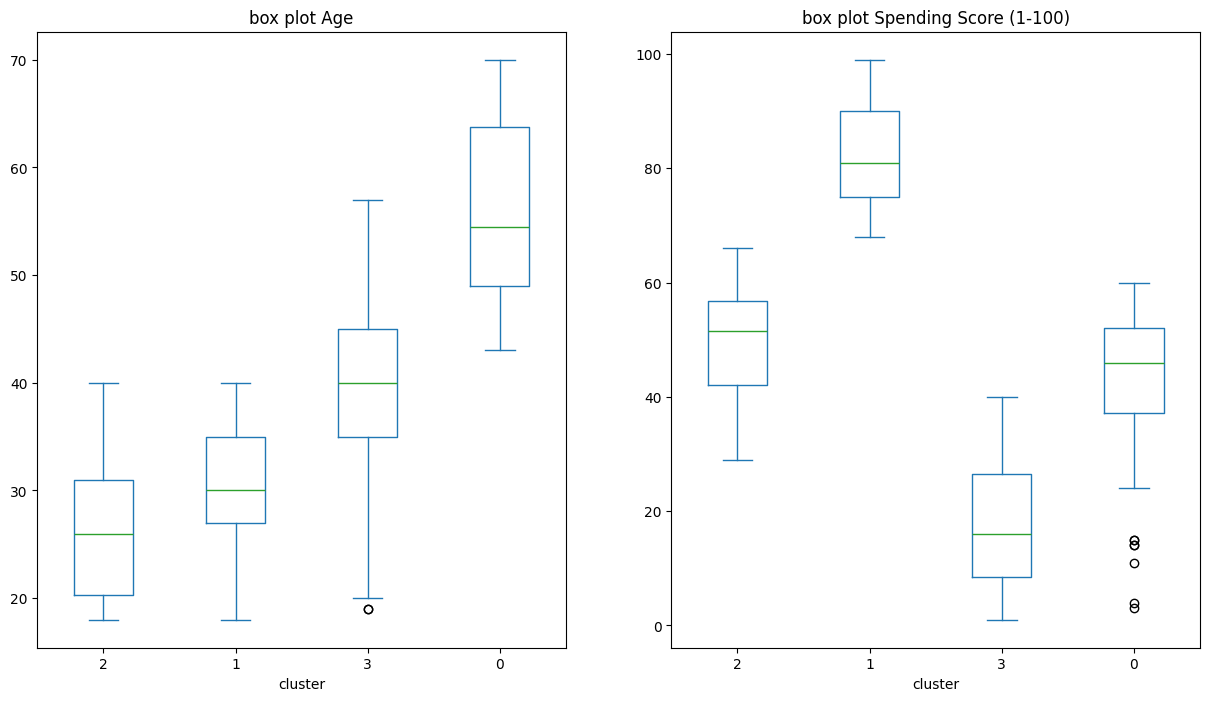

In [ ]:
#ADD new clolumn
#k-means
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
#model
kmeans = KMeans(n_clusters=4,init='k-means++',random_state=42)
#predict the labels
labels = kmeans.fit_predict(scaled_dat)
#add new colum
data['label'] = labels
kol = ['Age','Spending Score (1-100)']
fig,ax = plt.subplots(1,2,figsize=(15,8))
ax = ax.ravel()

for i,j in enumerate(kol):
  kum = {}
  for k in (data['label'].unique().tolist()):
    kum[k] = data[data['label'] == k][j]
  df = pd.DataFrame(kum)
  df.plot(kind='box',ax=ax[i],title=f"box plot {j}")
  ax[i].set_xlabel('cluster')


There are four mall customer segments:

Cluster 1 is dominated by young customers with a high spending score. A high score means these customers are very active shoppers in the mall.

Cluster 2 is also dominated by young customers (even younger than those in Cluster 1), but their spending score is lower than Cluster 1, meaning they shop actively but not as intensely.

Cluster 3 is dominated by adult customers who have the lowest spending score among all four clusters. This indicates they are less active shoppers, possibly due to budget considerations or other priorities.

Cluster 4 is dominated by older-generation customers, with low to medium spending scores, meaning they shop occasionally but are not high spenders.